# YOLOv8 Parking Lot Detection - Training Notebook

This notebook trains a YOLOv8 Nano model to detect empty and occupied parking spaces.

## Dataset Information
- **Classes**: 2 (space-empty, space-occupied)
- **Dataset**: PKLot from Roboflow
- **Splits**: Train, Validation, Test

## Hardware Configuration
- **GPU**: 12GB VRAM (Optimized batch size)
- **Model**: YOLOv8 Nano
- **Framework**: Ultralytics 8.0.196
- **PyTorch**: 2.6.0 with CUDA 11.8 support

## Step 1: Install Required Packages

Install Ultralytics 8.0.196 (required for Roboflow upload) with PyTorch 2.4.1 + CUDA 12.1 support.

In [1]:
# Install compatible versions with CUDA support
!pip install -r requirements.txt

## Step 2: Import Libraries

Import all necessary libraries for training.

In [2]:
import os
import sys
from pathlib import Path
from ultralytics import YOLO
import torch
import yaml
from IPython.display import Image, display
import matplotlib.pyplot as plt

print("All libraries imported successfully!")

All libraries imported successfully!


## Step 3: Check GPU Availability

Verify CUDA availability and check GPU specifications.

In [3]:
7# Check CUDA availability
device = '0' if torch.cuda.is_available() else 'cpu'

print("=" * 60)
print("GPU Information")
print("=" * 60)

if device == '0':
    print(f"CUDA is available")
    print(f"GPU Name: {torch.cuda.get_device_name(0)}")
    print(f"GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.2f} GB")
    print(f"CUDA Version: {torch.version.cuda}")
    print(f"PyTorch Version: {torch.__version__}")
else:
    print("WARNING: CUDA not available. Training will use CPU (slower).")

print("=" * 60)

GPU Information
CUDA is available
GPU Name: NVIDIA GeForce RTX 3060
GPU Memory: 12.00 GB
CUDA Version: 12.1
PyTorch Version: 2.5.1+cu121


## Step 4: Validate Dataset Structure

Check dataset paths and count images in each split.

In [4]:
# Define dataset path
data_path = os.path.abspath(os.path.join('..', 'Dataset', 'data.yaml'))

print("=" * 60)
print("Dataset Validation")
print("=" * 60)
print(f"Dataset config: {data_path}")

# Load and display dataset configuration
with open(data_path, 'r') as f:
    data_config = yaml.safe_load(f)

print(f"\nClasses: {data_config['nc']}")
print(f"Class Names: {data_config['names']}")

# Get dataset directory (where data.yaml is located)
dataset_dir = Path(data_path).parent

# Check each split
for split in ['train', 'val', 'test']:
    if split in data_config:
        # Resolve path relative to data.yaml location
        split_path = dataset_dir / data_config[split]
        split_path = split_path.resolve()
        
        if split_path.exists():
            num_images = len([f for f in split_path.iterdir() 
                            if f.suffix.lower() in ['.jpg', '.jpeg', '.png']])
            print(f"[OK] {split:5s}: {num_images:4d} images")
        else:
            print(f"[ERROR] {split:5s}: Path not found")
            print(f"        Looking for: {split_path}")

print("=" * 60)

Dataset Validation
Dataset config: d:\Smart-Parking-Lot-AI-system\Dataset\data.yaml

Classes: 2
Class Names: ['space-empty', 'space-occupied']
[OK] train: 26073 images
[OK] val  : 2483 images
[OK] test : 1242 images


## Step 5: Initialize YOLOv8 Model

Load the pretrained YOLOv8 Nano model.

In [5]:
# Initialize YOLOv8 Nano model with pretrained weights
model = YOLO('yolov8n.pt')

print("YOLOv8 Nano model initialized successfully!")
print(f"Model: YOLOv8n (Nano - optimized for speed)")
print(f"Task: Object Detection")
print(f"Parameters: ~3.2M")

d:\Smart-Parking-Lot-AI-system\.venv\Lib\site-packages\ultralytics\nn\tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu')

YOLOv8 Nano model initialized successfully!
Model: YOLOv8n (Nano - optimized for speed)
Task: Object Detection
Parameters: ~3.2M


## Step 6: Train the Model

**Training Configuration (Optimized for 12GB VRAM):**
- **Epochs**: 100 (with early stopping)
- **Image Size**: 640x640
- **Batch Size**: 32 (optimized for 12GB VRAM)
- **Workers**: 8
- **Mixed Precision**: Enabled
- **Cache**: Enabled for faster training

This will take approximately 30-60 minutes depending on your GPU.

In [6]:
# Training configuration optimized for 12GB VRAM
print("Starting Training...")
print("=" * 60)

results = model.train(
    # Dataset
    data=data_path,
    
    # Training parameters
    epochs=100,                     # Maximum number of epochs
    patience=50,                    # Early stopping patience
    
    # Image and batch configuration (optimized for 12GB VRAM)
    imgsz=640,                      # Image size (640x640)
    batch=16,                       # Reduced batch size to prevent memory errors
    
    # Device configuration
    device=device,                  # Use detected GPU/CPU
    workers=2,                      # Reduced workers (Windows multiprocessing spawn is memory-heavy)
    
    # Output configuration
    project='Smart-Parking-Lot-AI-system', # Project directory
    name='yolov8n_parking',         # Experiment name
    exist_ok=True,                  # Overwrite existing
    
    # Model configuration
    pretrained=True,                # Use pretrained weights
    optimizer='auto',               # Auto-select optimizer (AdamW)
    
    # Performance optimization
    amp=True,                       # Automatic Mixed Precision (faster on modern GPUs)
    cache=False,                    # Disable RAM caching to reduce memory pressure
    
    # Logging and saving
    verbose=True,                   # Verbose output
    seed=42,                        # Reproducibility
    save=True,                      # Save checkpoints
    save_period=-1,                 # Save only best and last
    plots=True,                     # Generate training plots
    val=True,                       # Validate during training
    
)

print("=" * 60)
print("Training completed!")

Starting Training...


New https://pypi.org/project/ultralytics/8.3.235 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196  Python-3.11.9 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
Ultralytics YOLOv8.0.196  Python-3.11.9 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=d:\Smart-Parking-Lot-AI-system\Dataset\data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=2, project=Smart-Parking-Lot-AI-system, name=yolov8n_parking, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, sav

Training completed!


## Step 7: Validate and Display Metrics

Evaluate the model on validation set and display comprehensive metrics.

In [7]:
# Validate the trained model
print("Running Validation...")
print("=" * 60)

metrics = model.val()

# Display comprehensive metrics
print("\nValidation Metrics:")
print("=" * 60)
print(f"mAP50-95: {metrics.box.map:.4f}    (Mean Average Precision at IoU 0.5:0.95)")
print(f"mAP50:    {metrics.box.map50:.4f}    (Mean Average Precision at IoU 0.5)")
print(f"mAP75:    {metrics.box.map75:.4f}    (Mean Average Precision at IoU 0.75)")
print(f"Precision: {metrics.box.mp:.4f}    (True Positives / All Predictions)")
print(f"Recall:    {metrics.box.mr:.4f}    (True Positives / All Ground Truths)")
print("=" * 60)

# Per-class metrics
print("\nPer-Class Metrics:")
print("=" * 60)
for i, class_name in enumerate(data_config['names']):
    print(f"{class_name:20s} - mAP50: {metrics.box.maps[i]:.4f}")

Ultralytics YOLOv8.0.196  Python-3.11.9 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)


Running Validation...


Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning D:\Smart-Parking-Lot-AI-system\Dataset\valid\labels.cache... 2483 images, 59 backgrounds, 0 corrupt: 100%|██████████| 2483/2483 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   2%|▏         | 3/156 [00:04<04:11,  1.64s/it]WARNING  NMS time limit 1.300s exceeded
WARNING  NMS time limit 1.300s exceeded
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 156/156 [00:59<00:00,  2.61it/s]

                   all       2483     143316      0.999      0.998      0.995       0.99
           space-empty       2483      73629      0.999      0.998      0.995      0.991
        space-occupied       2483      69687      0.999      0.998      0.995       0.99
                   all       2483     143316      0.999      0.998      0.995       0.99
           space-empty       2483      73629   


Validation Metrics:
mAP50-95: 0.9904    (Mean Average Precision at IoU 0.5:0.95)
mAP50:    0.9948    (Mean Average Precision at IoU 0.5)
mAP75:    0.9948    (Mean Average Precision at IoU 0.75)
Precision: 0.9987    (True Positives / All Predictions)
Recall:    0.9979    (True Positives / All Ground Truths)

Per-Class Metrics:
space-empty          - mAP50: 0.9911
space-occupied       - mAP50: 0.9896


## Step 8: Display Output Paths

Show where the trained models and plots are saved.

In [12]:
# Define output paths
output_dir = Path('Smart-Parking-Lot-AI-system') / 'yolov8n_parking'
weights_dir = output_dir / 'weights'
best_model = weights_dir / 'best.pt'
last_model = weights_dir / 'last.pt'

print("=" * 60)
print("Training Outputs")
print("=" * 60)
print(f"Best Model:  {best_model.resolve()}")
print(f"Last Model:  {last_model.resolve()}")
print(f"Results CSV: {(output_dir / 'results.csv').resolve()}")
print(f"Plots:       {output_dir.resolve()}")
print("=" * 60)

print("\nFor Roboflow Custom Weights Upload:")
print(f"   Upload this file: {best_model.resolve()}")

print("\nTo use the trained model:")
print("   from ultralytics import YOLO")
print(f"   model = YOLO('{best_model}')")
print("   results = model.predict('image.jpg')")

Training Outputs
Best Model:  D:\Smart-Parking-Lot-AI-system\Model-Training\Smart-Parking-Lot-AI-system\yolov8n_parking\weights\best.pt
Last Model:  D:\Smart-Parking-Lot-AI-system\Model-Training\Smart-Parking-Lot-AI-system\yolov8n_parking\weights\last.pt
Results CSV: D:\Smart-Parking-Lot-AI-system\Model-Training\Smart-Parking-Lot-AI-system\yolov8n_parking\results.csv
Plots:       D:\Smart-Parking-Lot-AI-system\Model-Training\Smart-Parking-Lot-AI-system\yolov8n_parking

For Roboflow Custom Weights Upload:
   Upload this file: D:\Smart-Parking-Lot-AI-system\Model-Training\Smart-Parking-Lot-AI-system\yolov8n_parking\weights\best.pt

To use the trained model:
   from ultralytics import YOLO
   model = YOLO('Smart-Parking-Lot-AI-system\yolov8n_parking\weights\best.pt')
   results = model.predict('image.jpg')


## Step 9: Visualize Training Results

Display training curves and metrics plots.

Training Visualizations:

1. Training Curves (Loss, mAP, Precision, Recall):


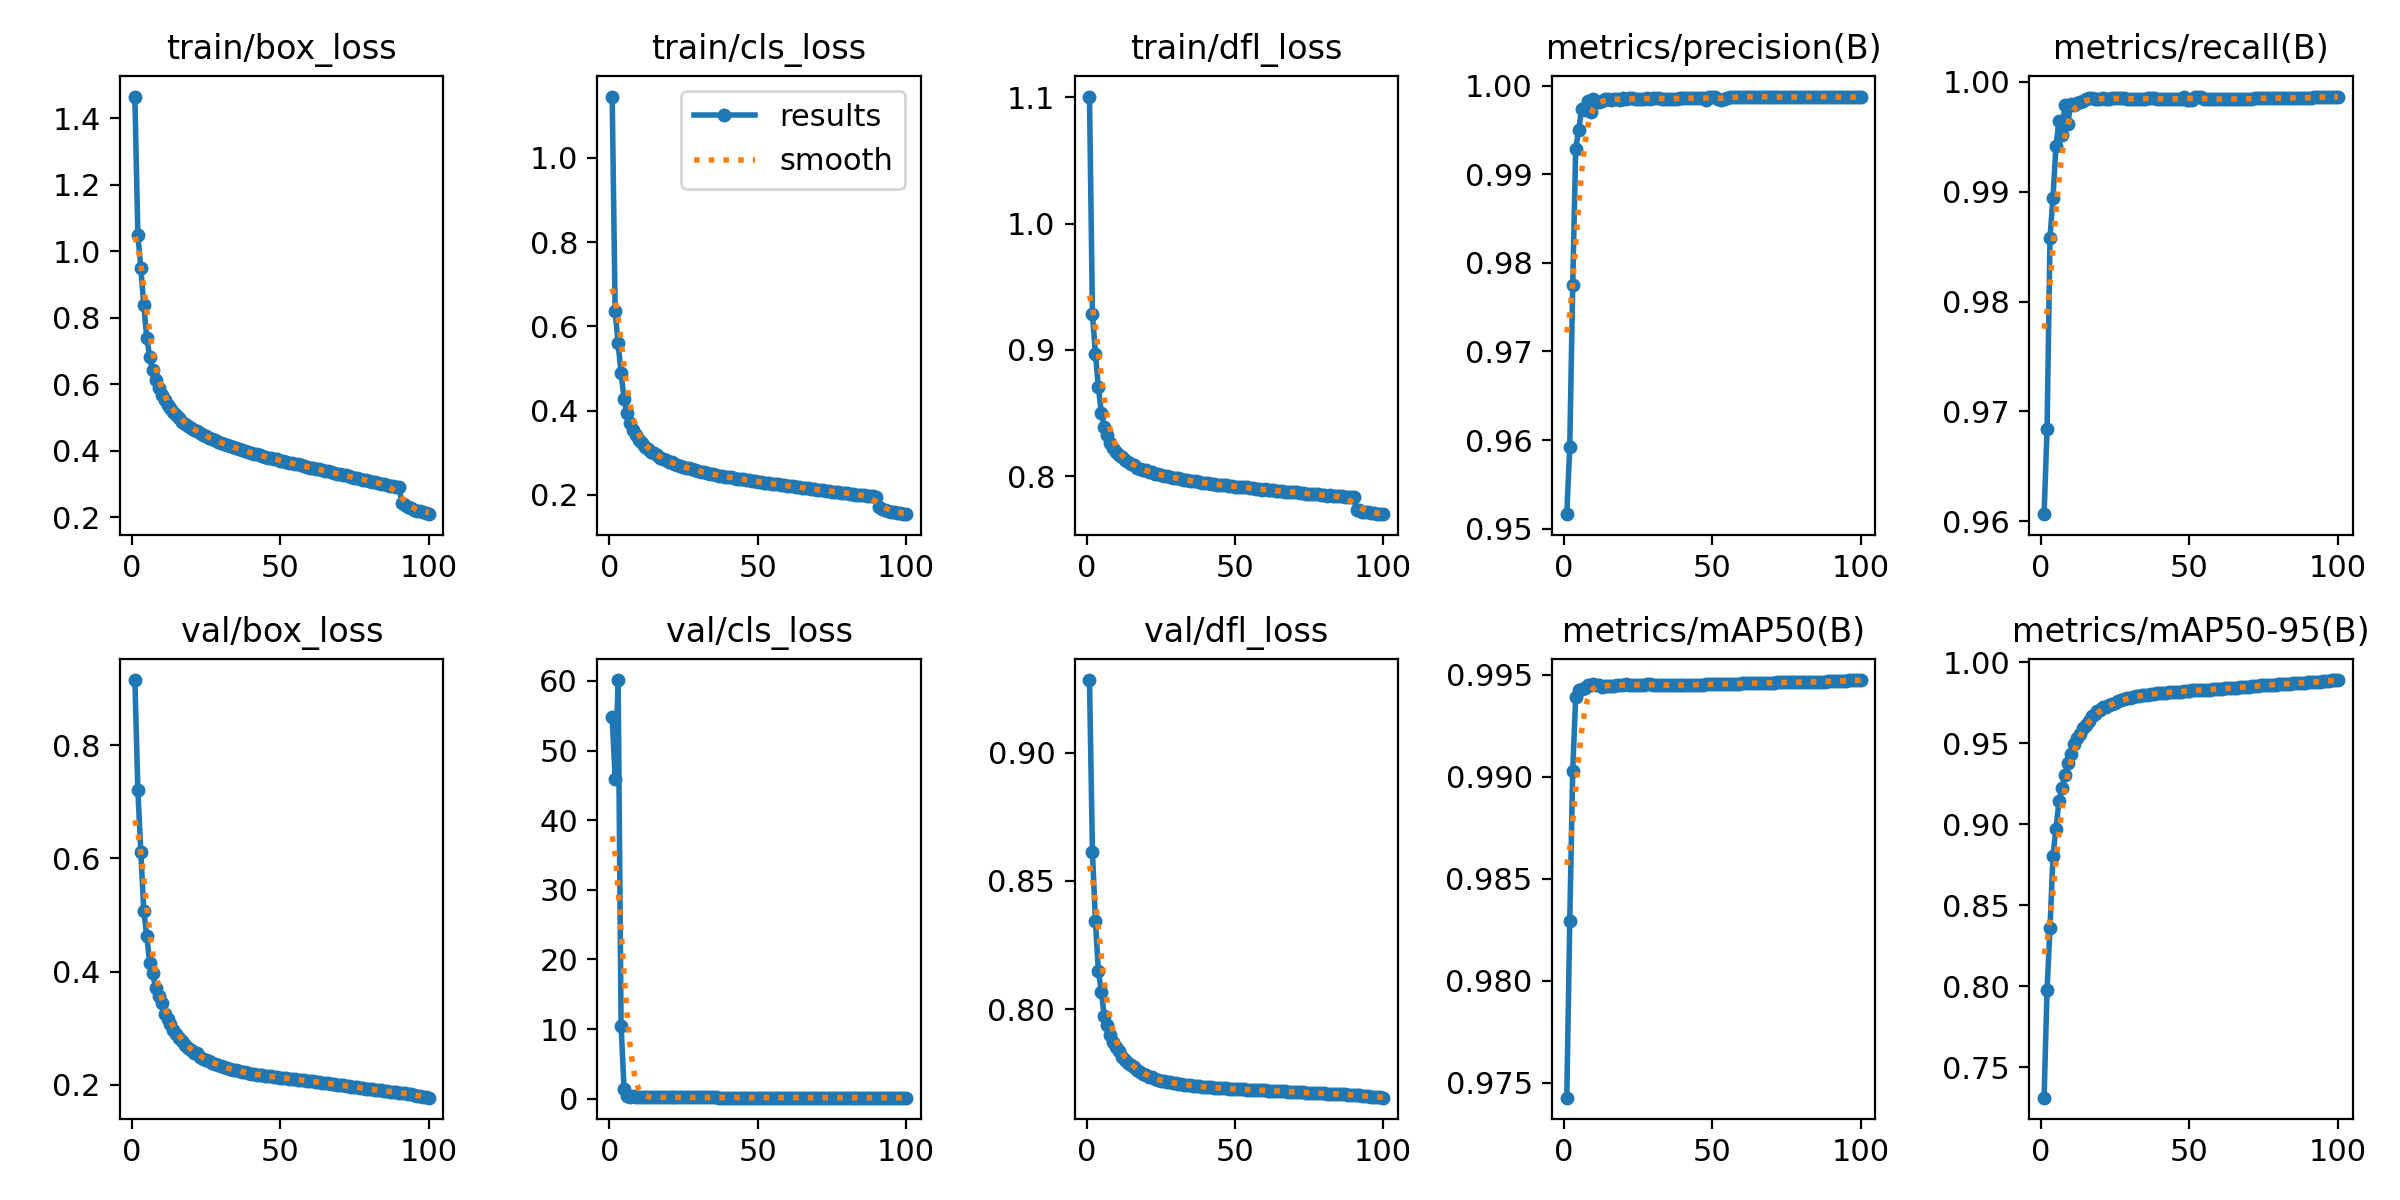


2. Confusion Matrix:


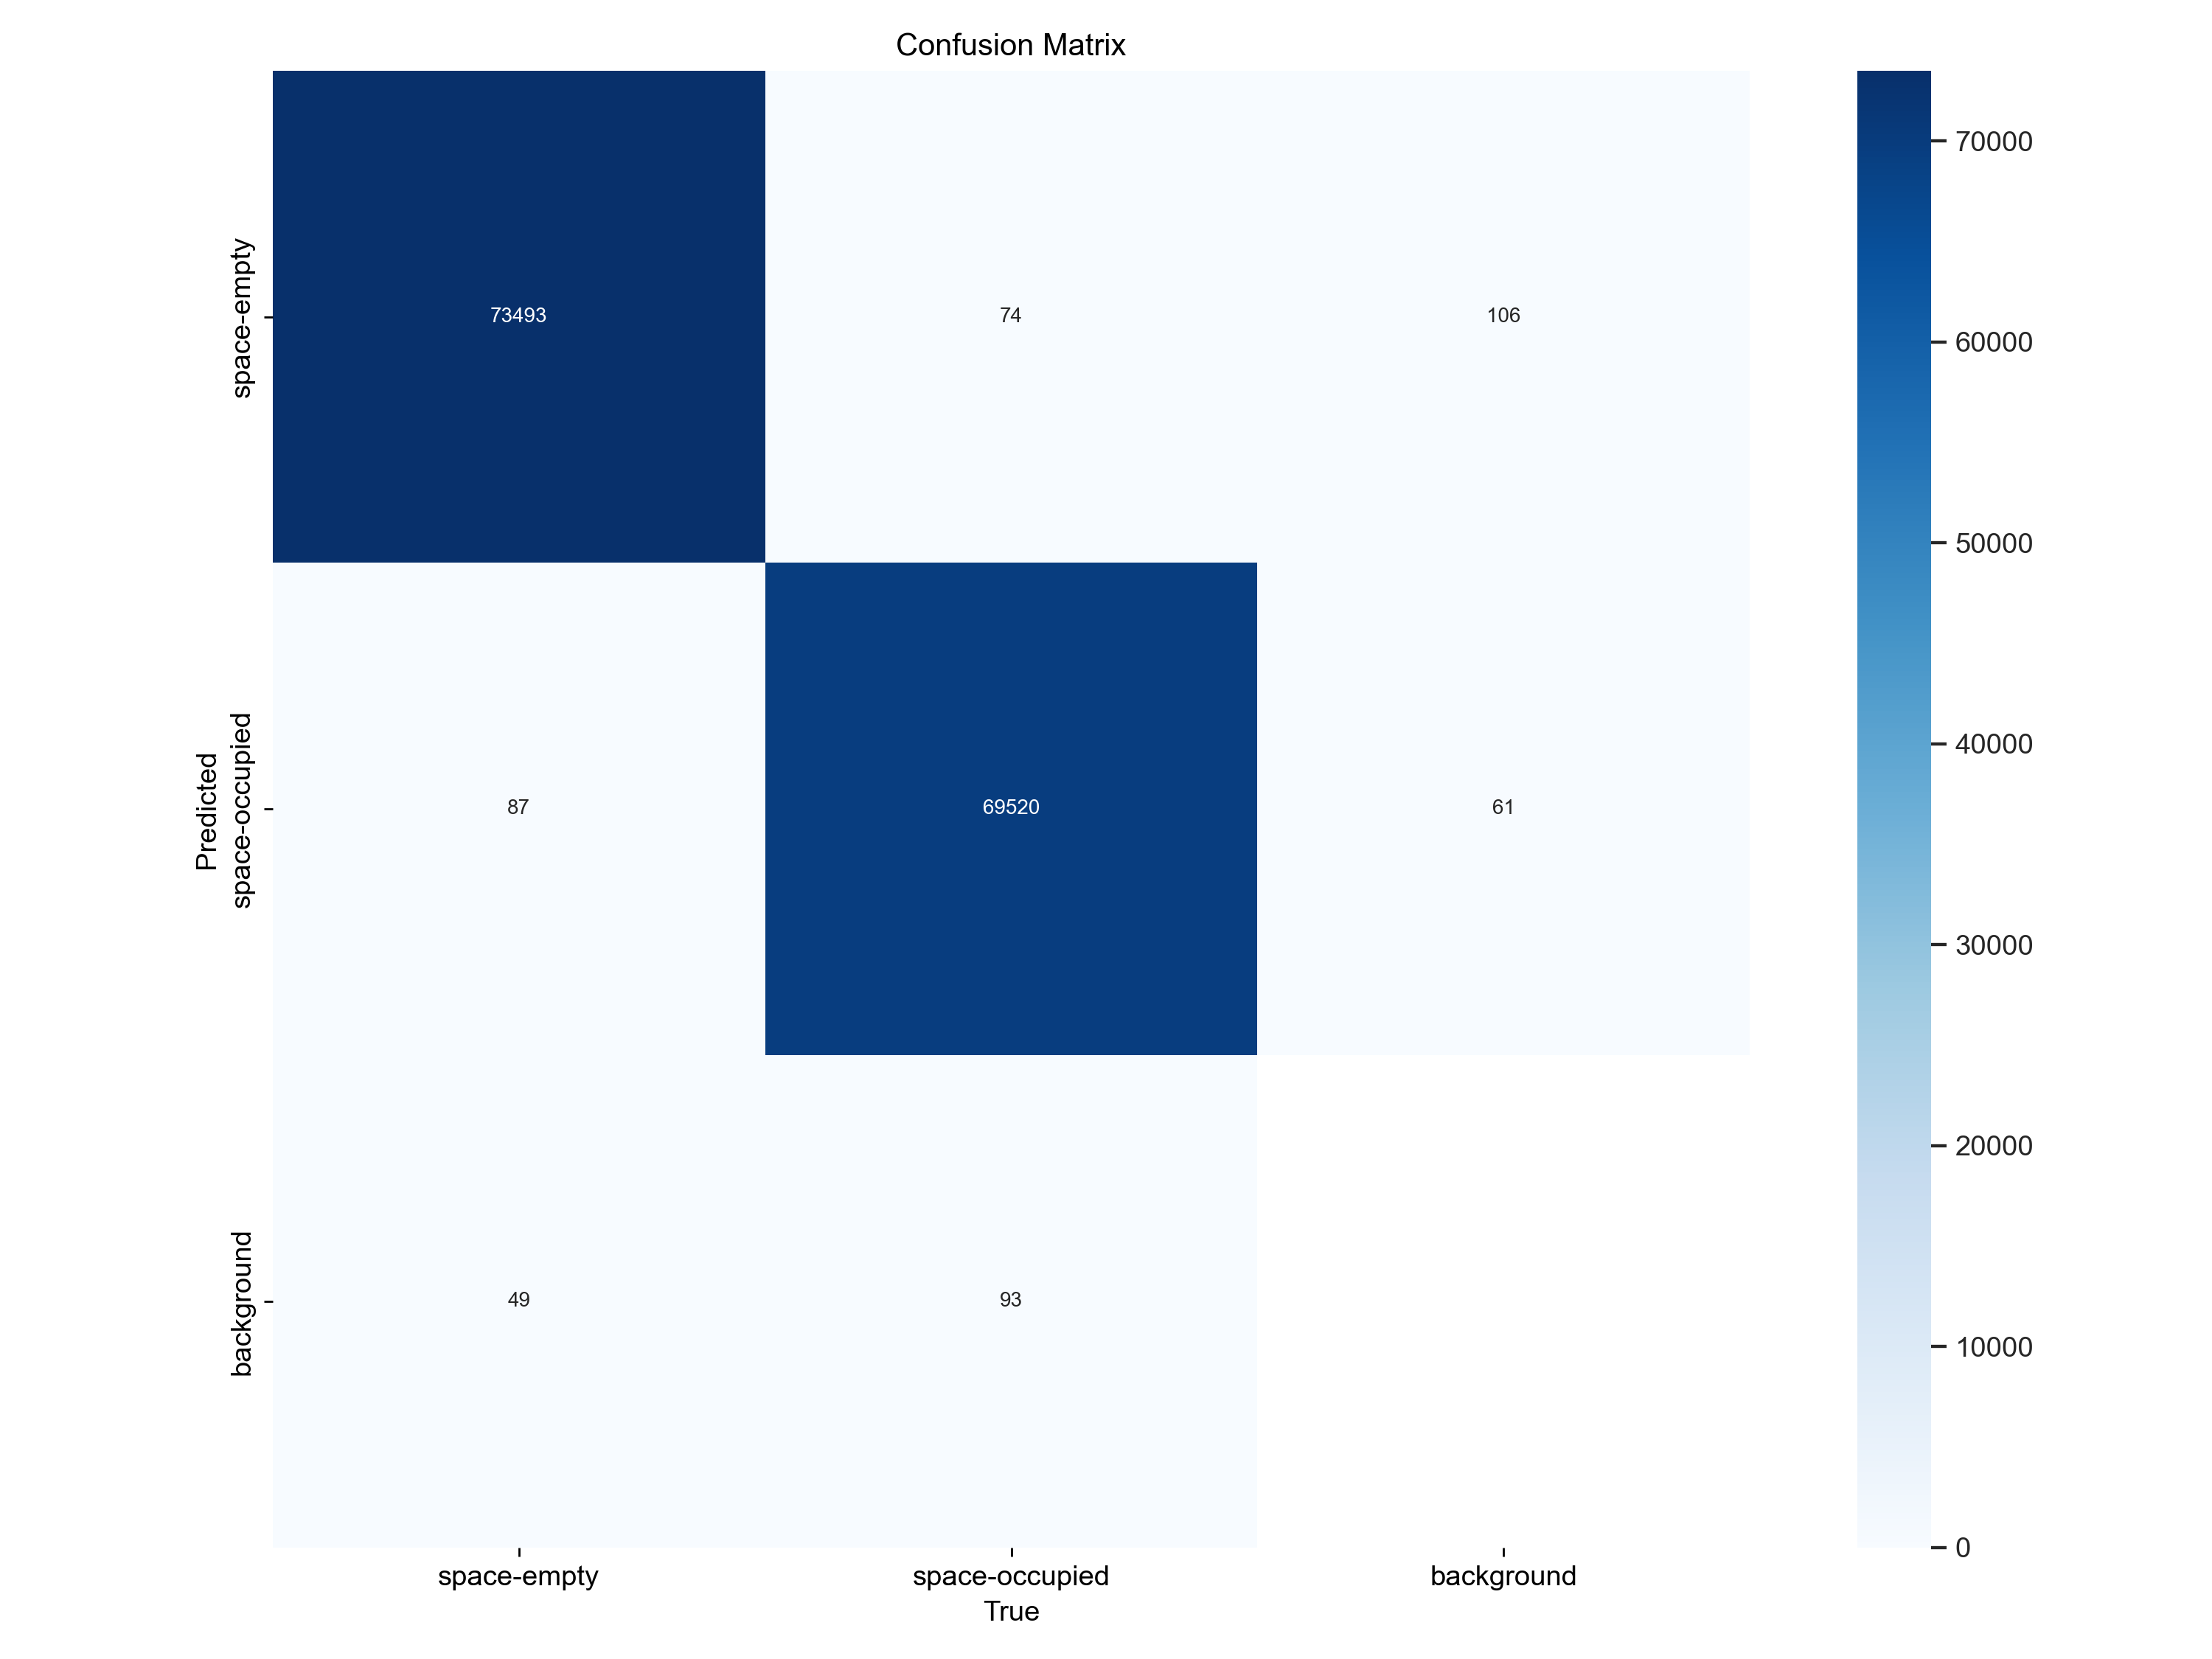

In [13]:
# Display training results
results_img = output_dir / 'results.png'
confusion_matrix = output_dir / 'confusion_matrix.png'

print("Training Visualizations:\n")

# Display results plot
if results_img.exists():
    print("1. Training Curves (Loss, mAP, Precision, Recall):")
    display(Image(filename=str(results_img)))
else:
    print("WARNING: Results plot not found")

# Display confusion matrix
if confusion_matrix.exists():
    print("\n2. Confusion Matrix:")
    display(Image(filename=str(confusion_matrix)))
else:
    print("WARNING: Confusion matrix not found")

## Step 10: Test the Model (Optional)

Test the trained model on a sample image from the test set.

In [14]:
# Load the best model
best_model_path = 'Smart-Parking-Lot-AI-system/yolov8n_parking/weights/best.pt'
trained_model = YOLO(best_model_path)

# Get a test image
test_images_dir = Path('..') / 'Dataset' / 'test' / 'images'
test_images = list(test_images_dir.glob('*.jpg'))[:5]  # Get first 5 images

if test_images:
    print(f"Testing on {len(test_images)} sample images:\n")
    
    for test_img in test_images:
        print(f"Testing: {test_img.name}")
        
        # Run inference
        results = trained_model.predict(str(test_img), conf=0.25, save=True)
        
        # Display detection info
        for result in results:
            boxes = result.boxes
            print(f"  Detected {len(boxes)} objects:")
            for box in boxes:
                class_id = int(box.cls[0])
                confidence = float(box.conf[0])
                class_name = trained_model.names[class_id]
                print(f"    - {class_name}: {confidence:.2f}")
        print()
    
    print(f"Predictions saved to: {trained_model.predictor.save_dir}")
else:
    print("WARNING: No test images found")

Testing on 5 sample images:

Testing: 2012-09-11_15_53_00_jpg.rf.266a03f194f71a6d19a10e04dc7d29f7.jpg


image 1/1 d:\Smart-Parking-Lot-AI-system\Model-Training\..\Dataset\test\images\2012-09-11_15_53_00_jpg.rf.266a03f194f71a6d19a10e04dc7d29f7.jpg: 384x640 29 space-emptys, 71 space-occupieds, 106.8ms
Speed: 4.4ms preprocess, 106.8ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)
Results saved to D:\Smart-Parking-Lot-AI-system\runs\detect\predict
Speed: 4.4ms preprocess, 106.8ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)
Results saved to D:\Smart-Parking-Lot-AI-system\runs\detect\predict


image 1/1 d:\Smart-Parking-Lot-AI-system\Model-Training\..\Dataset\test\images\2012-09-11_16_48_36_jpg.rf.94bb755c830e754e04f85cd90541e0d3.jpg: 384x640 25 space-emptys, 75 space-occupieds, 38.7ms
Speed: 8.5ms preprocess, 38.7ms inference, 6.5ms postprocess per image at shape (1, 3, 384, 640)
Results saved to D:\Smart-Parking-Lot-AI-system\runs\detect\predict

image 1/1 d:\Smart-Parking-Lot-AI-system\Model-Training\..\Dataset\test\images\2012-09-11_16_48_36_jpg.rf.9

  Detected 100 objects:
    - space-occupied: 0.94
    - space-occupied: 0.93
    - space-occupied: 0.93
    - space-empty: 0.93
    - space-empty: 0.93
    - space-occupied: 0.93
    - space-occupied: 0.93
    - space-occupied: 0.93
    - space-occupied: 0.93
    - space-occupied: 0.93
    - space-occupied: 0.93
    - space-occupied: 0.93
    - space-occupied: 0.93
    - space-occupied: 0.93
    - space-empty: 0.93
    - space-empty: 0.93
    - space-occupied: 0.92
    - space-occupied: 0.92
    - space-occupied: 0.92
    - space-empty: 0.92
    - space-occupied: 0.92
    - space-empty: 0.92
    - space-occupied: 0.92
    - space-empty: 0.92
    - space-occupied: 0.92
    - space-occupied: 0.92
    - space-empty: 0.92
    - space-occupied: 0.92
    - space-occupied: 0.92
    - space-empty: 0.92
    - space-occupied: 0.92
    - space-occupied: 0.92
    - space-empty: 0.92
    - space-occupied: 0.92
    - space-occupied: 0.92
    - space-empty: 0.92
    - space-occupied: 0.92
    - spac

image 1/1 d:\Smart-Parking-Lot-AI-system\Model-Training\..\Dataset\test\images\2012-09-12_06_36_36_jpg.rf.8b24e83da6d74653273fdf677cbd952d.jpg: 384x640 100 space-emptys, 9.8ms
Speed: 14.4ms preprocess, 9.8ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to D:\Smart-Parking-Lot-AI-system\runs\detect\predict

Speed: 14.4ms preprocess, 9.8ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to D:\Smart-Parking-Lot-AI-system\runs\detect\predict

image 1/1 d:\Smart-Parking-Lot-AI-system\Model-Training\..\Dataset\test\images\2012-09-12_08_15_53_jpg.rf.a53a5d22ab5968044c7cd5079fa48657.jpg: 384x640 7 space-emptys, 93 space-occupieds, 8.7ms
Speed: 1.0ms preprocess, 8.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to D:\Smart-Parking-Lot-AI-system\runs\detect\predict

image 1/1 d:\Smart-Parking-Lot-AI-system\Model-Training\..\Dataset\test\images\2012-09-12_08_15_53_jpg.rf.a53a5d22ab5968044c7cd5079fa

  Detected 100 objects:
    - space-empty: 0.94
    - space-empty: 0.94
    - space-empty: 0.94
    - space-empty: 0.94
    - space-empty: 0.94
    - space-empty: 0.94
    - space-empty: 0.94
    - space-empty: 0.94
    - space-empty: 0.94
    - space-empty: 0.94
    - space-empty: 0.94
    - space-empty: 0.94
    - space-empty: 0.94
    - space-empty: 0.94
    - space-empty: 0.94
    - space-empty: 0.94
    - space-empty: 0.93
    - space-empty: 0.93
    - space-empty: 0.93
    - space-empty: 0.93
    - space-empty: 0.93
    - space-empty: 0.93
    - space-empty: 0.93
    - space-empty: 0.93
    - space-empty: 0.93
    - space-empty: 0.93
    - space-empty: 0.93
    - space-empty: 0.93
    - space-empty: 0.93
    - space-empty: 0.93
    - space-empty: 0.93
    - space-empty: 0.93
    - space-empty: 0.93
    - space-empty: 0.93
    - space-empty: 0.93
    - space-empty: 0.93
    - space-empty: 0.93
    - space-empty: 0.93
    - space-empty: 0.93
    - space-empty: 0.93
    - space-empt

## Step 11: Export Model to Blob Format

Export the best model to .blob format for deployment on OAK-D cameras and edge devices.

In [ ]:
# Export to blob format for OAK-D cameras
print("Converting model to .blob format for edge deployment...\n")

try:
    # Export to ONNX first (required intermediate step)
    print("Step 1: Exporting to ONNX...")
    onnx_path = trained_model.export(format='onnx', imgsz=640)
    print(f"✅ ONNX export successful: {onnx_path}\n")
    
    # Note: To convert ONNX to .blob, you need blobconverter
    # Install it with: pip install blobconverter
    print("Step 2: Converting ONNX to .blob...")
    
    try:
        import blobconverter
        
        # Convert ONNX to OpenVINO IR format, then to blob
        blob_path = blobconverter.from_onnx(
            model=str(onnx_path),
            data_type="FP16",
            shaves=6,
            use_cache=False,
            output_dir=str(Path(onnx_path).parent)
        )
        print(f"✅ Blob conversion successful: {blob_path}")
        print(f"\nYou can now deploy this .blob file to your OAK-D camera!")
        
    except ImportError:
        print("⚠️  blobconverter not installed.")
        print("\nTo complete the conversion, run:")
        print("   pip install blobconverter")
        print("\nThen use this code:")
        print(f"   import blobconverter")
        print(f"   blob_path = blobconverter.from_onnx(")
        print(f"       model='{onnx_path}',")
        print(f"       data_type='FP16',")
        print(f"       shaves=6")
        print(f"   )")
        
except Exception as e:
    print(f"❌ Export failed: {e}")